In [1]:
! pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 6.5 MB/s eta 0:00:00


In [2]:
! pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=e6e19745927857605d36a274d70f52a5beafa9dd2fcefdb9e8ee033925e0a129
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [11]:
! pip install qiskit_aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 47.3 MB/s eta 0:00:00


# **Deutsch Algorithm**

Before we begin implementing the Deutsch Algorithm in Qiskit, let us first import all the necessary libraries that are required for this purpose:

In [1]:
from qiskit import QuantumCircuit
from qiskit.providers.basic_provider import BasicSimulator
from qiskit import transpile
from qiskit.visualization import plot_histogram

In the first step, we create a 2 qubit circuit with qubit1 set to |0〉and qubit2 set to |1〉. For that, we apply an identity gate to qubit1 and a Hadamard gate to qubit2.

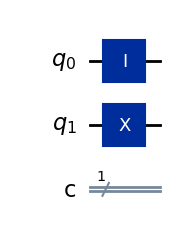

In [2]:
qc=QuantumCircuit(2,1)
qc.id(0)
qc.x(1)
qc.draw(output='mpl')

In the next step, using Hadamard Gates, we create a superposition state that allows us to simultaneously iterate through all four states of the two qubit system.

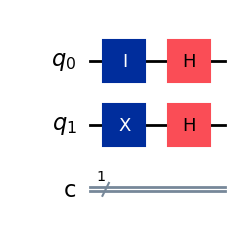

In [3]:
qc.h(0)
qc.h(1)
qc.draw(output='mpl')

Next we apply the oracle, in our case to simplify the code, we are using a CNOT gate which operates on q0 and q1.
Depending upon the state of q0 it acts either as a not on q1 or does not change the state of q1.

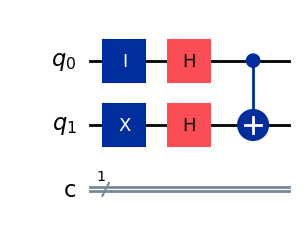

In [4]:
qc.cx(0,1)
qc.draw(output='mpl')

In the next step, we add hadamard gates to all the qubits and create a superposition.

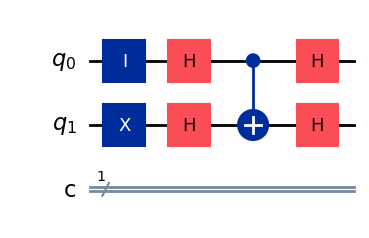

In [5]:
qc.h(0)
qc.h(1)
qc.draw(output='mpl')

In the last step, we take the measurement of qubit0, if the output of this qubit is 0 then the function is a constant
function. If the output of the qubit is 1 then the function is a balanced function.

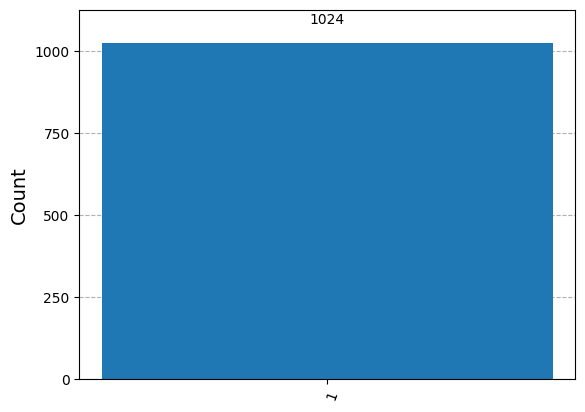

In [6]:
qc.measure(0,0)
backend = BasicSimulator()
tqc = transpile(qc, backend)
counts = backend.run(tqc).result().get_counts()
plot_histogram(counts)

Since the output is 1, the function is a balanced function.

# **Deutsch-Jozsa Algorithm**

Let us implement the Deutsch-Jozsa Algorithm in Qiskit. Let us first import all the necessary libraries
that are required:

In [3]:
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.basic_provider import BasicSimulator
from qiskit import transpile
from qiskit.visualization import plot_histogram

Lets define the variable n to represent the number of qubits we want in our first register. The value of 2n represents
the total number of potential inputs that our function can accommodate. In our case let us take n to be 3, which means
the length of the first register for querying the oracle is 3.


In [4]:
n = 3

Select an oracle type at random. There is a 50% chance that it is constant, and an equal 50% chance that it is
balanced.

In [17]:
oracleType, oracleValue = np.random.randint(2), np.random.randint(2)
if oracleType == 0:
  print("The oracle returns a constant value ", oracleValue)
else:
  print("The oracle returns a balanced function")
  a = np.random.randint(1,2**n) # this is a hidden parameter for balanced oracle.

The oracle returns a constant value  0


To create registers, we need to allocate n qubits for querying the oracle and one additional qubit for storing the
answer. All qubits are initially set to zero. The first register is used to record the measurement.

In [18]:
qr = QuantumRegister(n+1)
cr = ClassicalRegister(n)
circuitName = "DeutschJozsa"
djCircuit = QuantumCircuit(qr, cr)

Apply the Hadamard gate to each qubit in the first register to create the superposition of all input queries.

In [19]:
for i in range(n):
  djCircuit.h(qr[i])

Flip the second register and apply the Hadamard gate.

In [20]:
djCircuit.x(qr[n])
djCircuit.h(qr[n])

Apply barrier to mark the beginning of the oracle. If the oracleType is ”0”, the oracle returns oracleValue for all input.
Otherwise, it returns the inner product of the input with a (non-zero bitstring)

In [21]:
djCircuit.barrier()
if oracleType == 0:
  if oracleValue == 1:
    djCircuit.x(qr[n])
  else:
    djCircuit.id(qr[n])
else:
  for i in range(n):
    if (a & (1 << i)):
      djCircuit.cx(qr[i], qr[n])

Apply barrier to mark the end of the oracle. Apply Hadamard gates after querying the oracle. Final step would be to
measure all the qubits.

In [22]:
djCircuit.barrier()
for i in range(n):
  djCircuit.h(qr[i])
  djCircuit.barrier()
for i in range(n):
  djCircuit.measure(qr[i], cr[i])

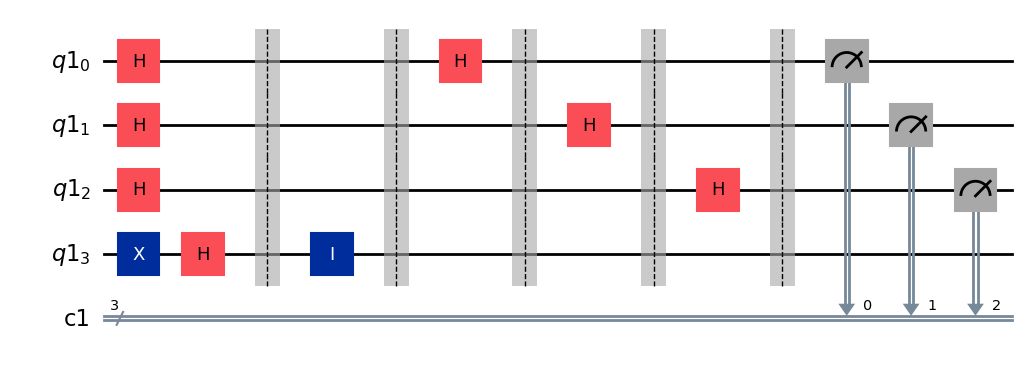

In [23]:
djCircuit.draw(output='mpl')

Code to run the algorithm and the output is shown here:

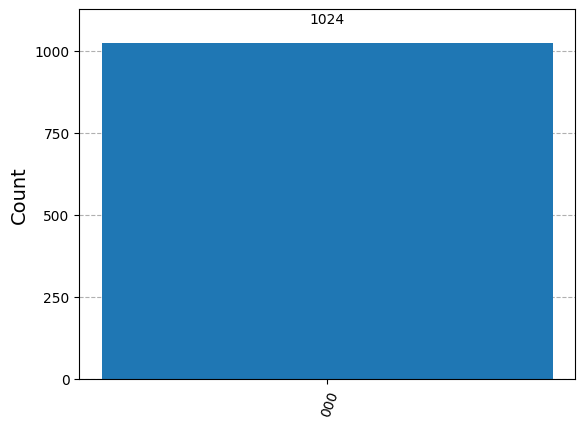

In [24]:
backend = BasicSimulator()
tqc = transpile(djCircuit, backend)
counts = backend.run(tqc).result().get_counts()
plot_histogram(counts)

# **Bernstein-Vazirani Algorithm**

In [4]:
from qiskit import QuantumCircuit
from qiskit.providers.basic_provider import BasicSimulator
from qiskit import transpile
from qiskit.visualization import plot_histogram

In [5]:
secret_number = input("Input a Binary String of your choice")

Input a Binary String of your choice1010


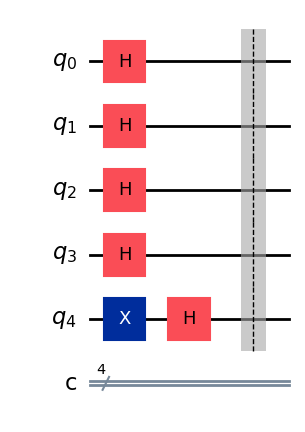

In [6]:
circ = QuantumCircuit(len(secret_number)+1,len(secret_number))
circ.h(range(len(secret_number)))
circ.x(len(secret_number))
circ.h(len(secret_number))
circ.barrier()
circ.draw("mpl")

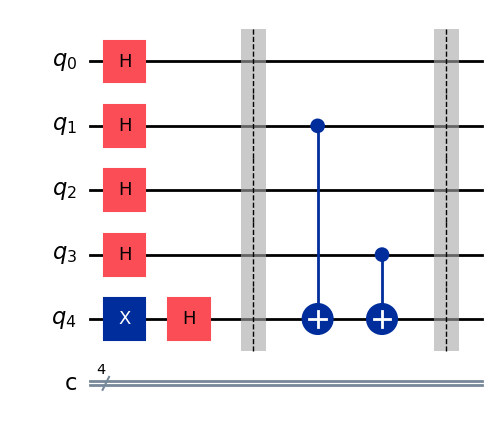

In [7]:
for digit, query in enumerate(reversed(secret_number)):
  if query == "1":
    circ.cx(digit, len(secret_number))
circ.barrier()
circ.draw("mpl")

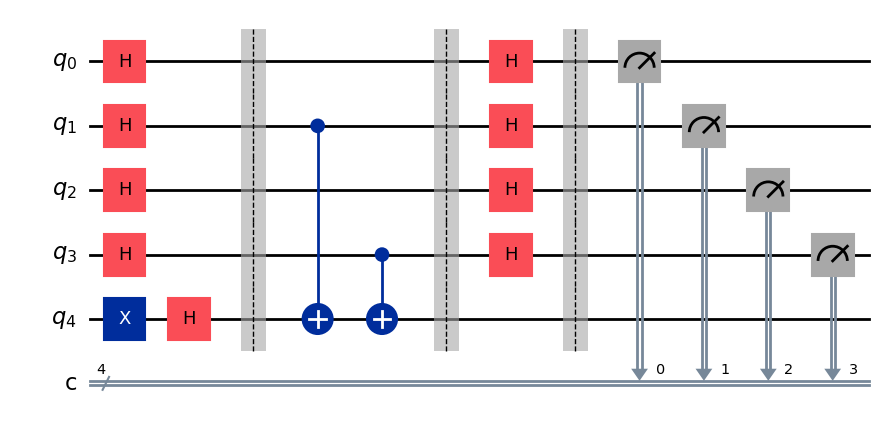

In [8]:
circ.h(range(len(secret_number)))
circ.barrier()
circ.measure(range(len(secret_number)),range(len(secret_number)))
circ.draw("mpl")

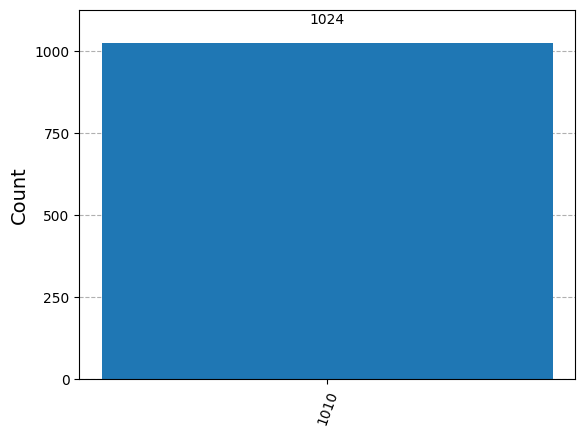

In [9]:
backend = BasicSimulator()
tqc = transpile(circ, backend)
counts = backend.run(tqc).result().get_counts()
plot_histogram(counts)


# **Simon’s Algorithm**

Let us implement simon’s algorithm. Before we start, let us import all the necessary libraries from qiskit:

In [12]:
from qiskit import QuantumCircuit, transpile, assemble, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
from qiskit_aer import Aer
from qiskit.providers.basic_provider import BasicSimulator
import numpy as np

Let us assume the hidden bitstring to be ‘001’. In the following code we define the bitstring with ‘s’, it should be also
noted that lenght of s must be between 2 and 10. The above restriction in length of the bitstring in not universal and we
use it for easy computational purpose. Also, all the numbers of the bitstring must be of either 0’s or 1’s.

In [13]:
s = "10" # the hidden bitstring
assert 1 < len(s) < 10, "The length of s must be between 2 and 19"

for c in s:
  assert c == "0" or c == "1", "s must be a bitstring of '0' and '1'"

n = len(s) #the length of the bitstring

In the next step, let us create the simon circuit to find the bitstring s. The number of qubits is 2*n, where n is the
length of the bitstring, whereas the number of bits to measure the circuit is n. As suggested in equation 9 we start by
applying hadamard gates to the qubits.

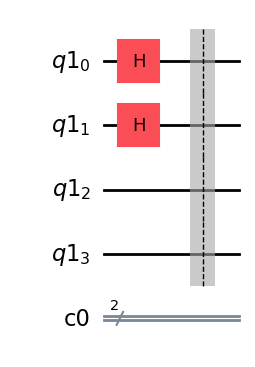

In [14]:
# Creating registers
# qubits for querying the oracle and recording its output
qr = QuantumRegister(2*n)
# for recording the measurement on the first register of qr
cr = ClassicalRegister(n)
circuitName = "Simon"
simonCircuit = QuantumCircuit(qr, cr)
# Step 2
# Apply Hadamard gates before querying the oracle
for i in range(n):
  simonCircuit.h(qr[i])
# Apply barrier to mark the beginning of the blackbox function
simonCircuit.barrier()
simonCircuit.draw('mpl')

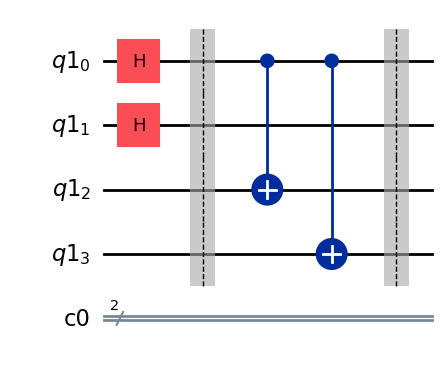

In [15]:
# Create the oracle function of our secret string
# Since we are only setting the first qubit to be 1,
# we will only apply cx gates to the first qubit.
for idx in range(n):
  if(s[idx] == '1'):
    for count in range(n):
      simonCircuit.cx(idx, n + count)

simonCircuit.barrier()
simonCircuit.draw('mpl')

Next, we proceed with the sequential execution of the Simon algorithm by implementing the Hadamard gates on the
first register and subsequently performing a measurement.

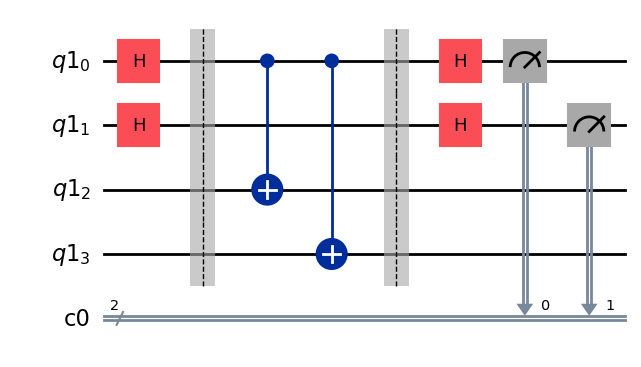

In [16]:
# Step 4 apply Hadamard gates to the first register
for i in range(n):
  simonCircuit.h(qr[i])
# Step 5 perform measurement on the first register
for i in range(n):
  simonCircuit.measure(qr[i], cr[i])
#draw the circuit
simonCircuit.draw('mpl')

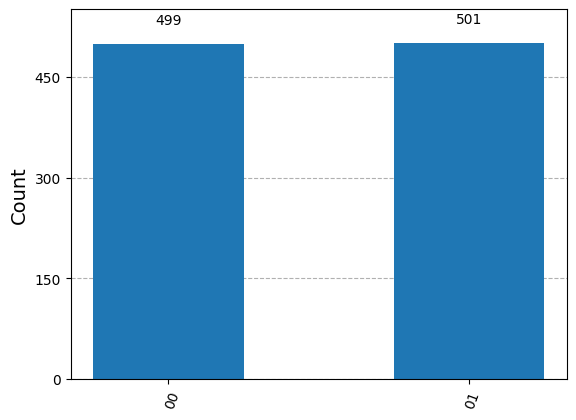

In [17]:
backend = BasicSimulator()
tqc = transpile(simonCircuit, backend)
counts = backend.run(tqc, shots=1000).result().get_counts()
plot_histogram(counts)

As we can see in the graph shown in Figure, we have two input register results - 00 and 01- for our secret string
(s=10). String values are reversed in Qiskit, so 01 is actually ’10’, our secret string. If we had only ’00’ as the result then
this would have meant that f is a one-to-one function. This would have been possible if s=’00’. Since we have s=’10’, we
know that f is a two-to-one function.